## Singular Value Decomposition

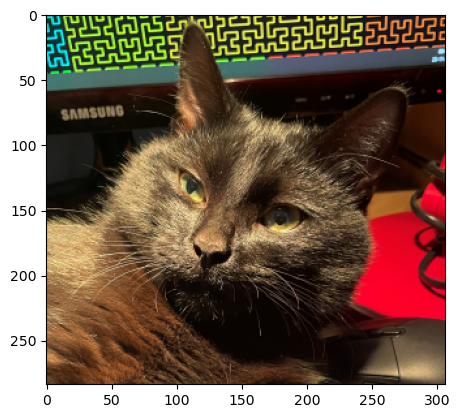

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio.v3 as iio

im = iio.imread("../datasets/kat.png")

plt.imshow(im)

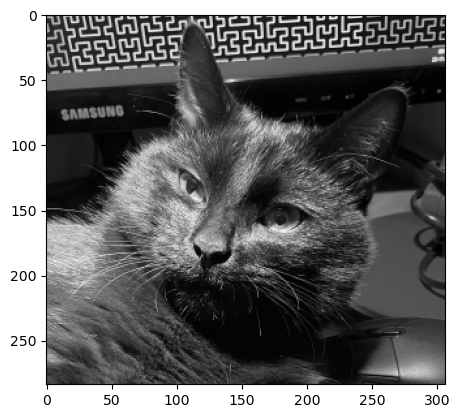

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_im = rgb2gray(im)
plt.imshow(gray_im, cmap=plt.get_cmap('gray'))

Every matrix $\mathbf{X}$ of size $m \times n$ can be decomposed as a product of 3 matrices $\mathbf{U} \Sigma \mathbf{V}^T$, where
- $\mathbf{U}$ represents the $m \times m$ matrix with the eigenvectors of $\mathbf{X}\mathbf{X}^T$ in its columns.
- $\mathbf{V}$ represents the $n \times n$ matrix with the eigenvectors of $\mathbf{X}^T\mathbf{X}$ in its columns.
- $\Sigma$ represents the $m \times n$ diagonal matrix with the $k = \min(m, n)$ **singular values**, $\lambda_i, i = 1, \dots, k$ on its diagonal that are the square roots of the nonzero eigenvalues of both $\mathbf{X}^T\mathbf{X}$ and $\mathbf{X}\mathbf{X}^T$. 

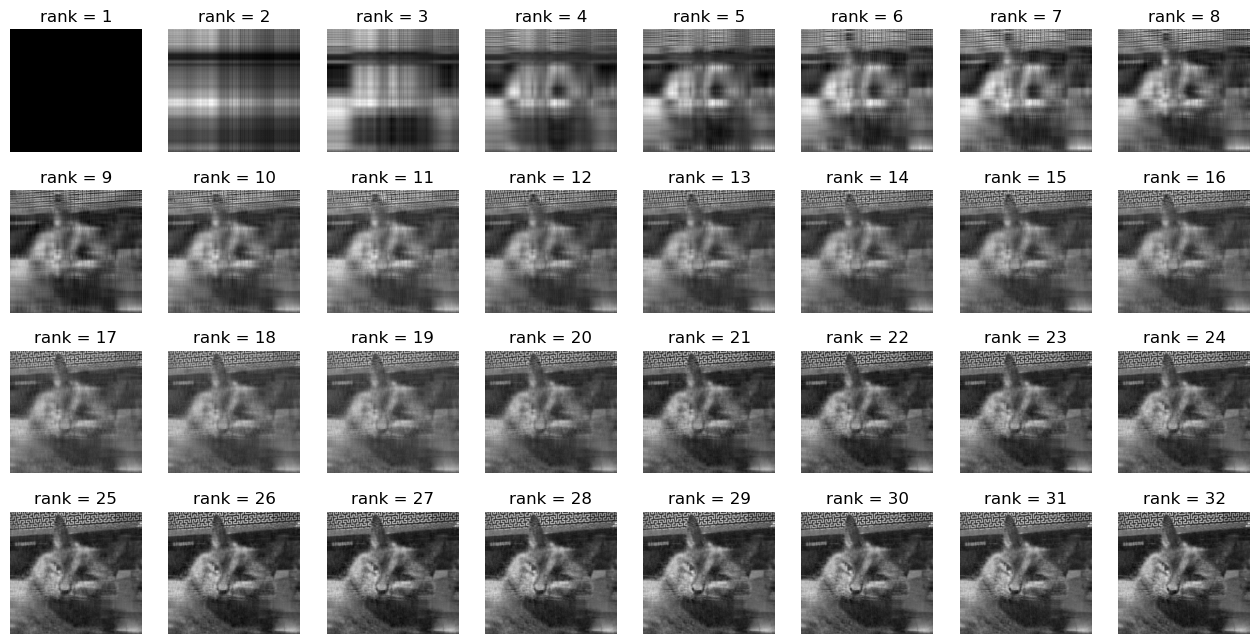

In [195]:
u, s, vh = np.linalg.svd(gray_im)

fig, axes = plt.subplots(4, 8, figsize=(16, 8))

axes = axes.flatten()

di = np.diag_indices(min(u.shape[0], vh.shape[0]))
S = np.zeros((u.shape[0], vh.shape[0]))
S[di] = s

for i in range(len(axes)):
    axes[i].imshow(u[:, :i] @ S[:i, :i] @ vh[:i, :], cmap=plt.get_cmap('gray'))
    axes[i].axis("off")
    axes[i].set_title(f"rank = {i+1}")

In contrast to `np.linalg.svd`, the eigenvectors returned by `np.linalg.eigh` for both $\mathbf{U}$ and $\mathbf{V}$ are not coupled in any way. Eigenvectors are in general not **unique**. Multiplying an eigenvector by -1 still gives a valid eigenvector. Therefore, there is a good chance of sign mismatch. 
A straightforward way to deal with this is to derive $\mathbf{U}$ in terms of 
The matrix $\mathbf{U}$ can also be $\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^T$:
\begin{align*}
    \mathbf{X} &= \mathbf{U} \Sigma \mathbf{V}^T\\
    \mathbf{X}\mathbf{V} &= \mathbf{U} \Sigma\\
    \mathbf{X}\mathbf{V}\Sigma^{-1} &= \mathbf{U}\\
    \mathbf{U} &= \mathbf{X}\mathbf{V}\Sigma^{-1}
\end{align*}

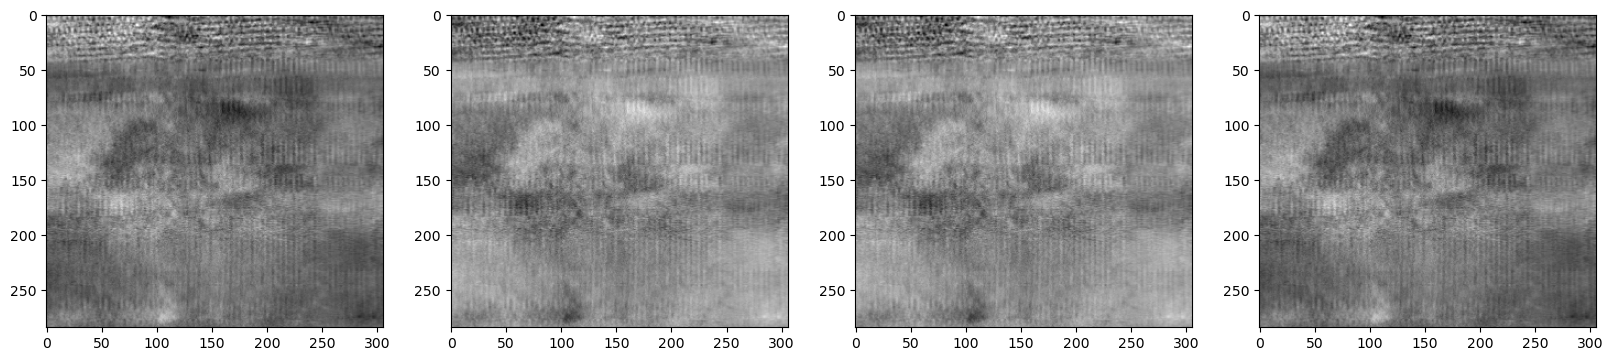

In [187]:
X = gray_im

u_eigvals, u = np.linalg.eigh(X @ X.T)
v_eigvals, v = np.linalg.eigh(X.T @ X)

if u.shape[0] < v.shape[0]:
    S = u_eigvals 
else:
    S = v_eigvals
    

ind_u = np.argsort(u_eigvals)[::-1]
ind_v = np.argsort(v_eigvals)[::-1]
u = u[:, ind_u] 
v = v[:, ind_v]

S = np.sqrt(np.sort(S)[::-1])

di = np.diag_indices(min(u.shape[0], v.shape[0]))
sigma = np.zeros((u.shape[0], v.shape[0]))
sigma[di] = S

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow((u @ sigma @ v.T), cmap=plt.get_cmap('gray'))
axes[1].imshow((-u @ sigma @ v.T), cmap=plt.get_cmap('gray'))
axes[2].imshow((u @ sigma @ -v.T), cmap=plt.get_cmap('gray'))
axes[3].imshow((-u @ sigma @ -v.T), cmap=plt.get_cmap('gray'))

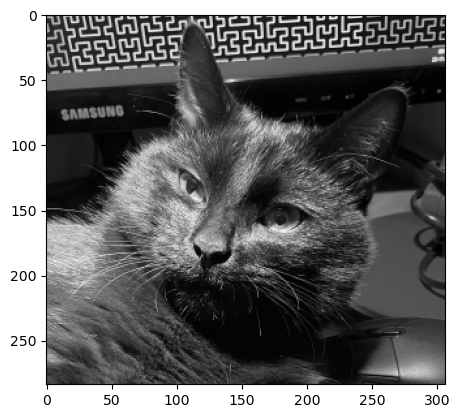

In [182]:
# trick to find U
u_hat = X @ v @ np.linalg.pinv(sigma)

plt.imshow((u_hat @ sigma @ v.T), cmap=plt.get_cmap('gray'))

In [191]:
X = np.array([
    [1, 2, 3],
    [4, 5, 6]   
], dtype='float64')

svd_u, svd_s, svd_vh = np.linalg.svd(X)
print(svd_u)
print(svd_s)
print(svd_vh)

u_eigvals, u = np.linalg.eigh(X @ X.T)
v_eigvals, v = np.linalg.eigh(X.T @ X)

if u.shape[0] < v.shape[0]:
    S = u_eigvals 
else:
    S = v_eigvals
    

ind_u = np.argsort(u_eigvals)[::-1]
ind_v = np.argsort(v_eigvals)[::-1]
u = u[:, ind_u] 
v = v[:, ind_v]

S = np.sqrt(np.sort(S)[::-1])

di = np.diag_indices(min(u.shape[0], v.shape[0]))
sigma = np.zeros((u.shape[0], v.shape[0]))
sigma[di] = S

u = X @ v @ np.linalg.pinv(sigma)

u, sigma, v.T

[[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


(array([[-0.3863177 ,  0.92236578],
        [-0.92236578, -0.3863177 ]]),
 array([[9.508032  , 0.        , 0.        ],
        [0.        , 0.77286964, 0.        ]]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [-0.80596391, -0.11238241,  0.58119908],
        [ 0.40824829, -0.81649658,  0.40824829]]))